In [31]:
%cd ../..
%load_ext autoreload
%autoreload 2

/home/lior/git
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
#Import general libraries (needed for functions)`
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from gatelevel_qiskit.waveform_comparator import WaveformComparator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb
from qiskit.pulse import Schedule, Play, Gaussian, DriveChannel, ShiftPhase, Waveform, ControlChannel, MeasureChannel, AcquireChannel
from qiskit.circuit import Gate
#Import Qiskit classes 
import qiskit
from pprint import pprint
from deepdiff import DeepDiff

from gatelevel_qiskit.circuit_to_qua2 import CircuitQua2Transformer
from gatelevel_qiskit.lib import wfs_no_samples, summary_of_inst, get_min_time
from gatelevel_qiskit.simple_backend import simple_backend
from rb_config2 import config_base


In [47]:
# generate RB 2QB
c1 = qiskit.circuit.quantumcircuit.QuantumCircuit(2)
c1.x(0)
rb_circs1, xdata = rb.randomized_benchmarking_seq(length_vector=[1,2,3,4,5], nseeds=3, rb_pattern=[[0, 1]])
circ = rb_circs1[0][0]

In [48]:
circ.draw()

┌───┐           ┌───┐ ┌───┐                ░                  ┌─────┐»
qr_0: ┤ Z ├───────■───┤ H ├─┤ S ├──■─────────────░───────────────■──┤ SDG ├»
      ├───┤┌───┐┌─┴─┐┌┴───┴┐├───┤┌─┴─┐┌───┐┌───┐ ░ ┌─────┐┌───┐┌─┴─┐└┬───┬┘»
qr_1: ┤ Y ├┤ H ├┤ X ├┤ SDG ├┤ H ├┤ X ├┤ H ├┤ S ├─░─┤ SDG ├┤ H ├┤ X ├─┤ H ├─»
      └───┘└───┘└───┘└─────┘└───┘└───┘└───┘└───┘ ░ └─────┘└───┘└───┘ └───┘ »
cr: 2/═════════════════════════════════════════════════════════════════════»
                                                                           »
«      ┌───┐     ┌───┐     ┌─┐   
«qr_0: ┤ H ├──■──┤ Z ├─────┤M├───
«      ├───┤┌─┴─┐├───┤┌───┐└╥┘┌─┐
«qr_1: ┤ S ├┤ X ├┤ H ├┤ Y ├─╫─┤M├
«      └───┘└───┘└───┘└───┘ ║ └╥┘
«cr: 2/═════════════════════╩══╩═
«                           0  1

In [27]:
circ = qiskit.circuit.quantumcircuit.QuantumCircuit(2)
circ.cnot(0,1)

In [55]:
circ_qua = CircuitQua2Transformer(pulse_backend=simple_backend,
                                config_base=config_base,
                                circuit=circ)

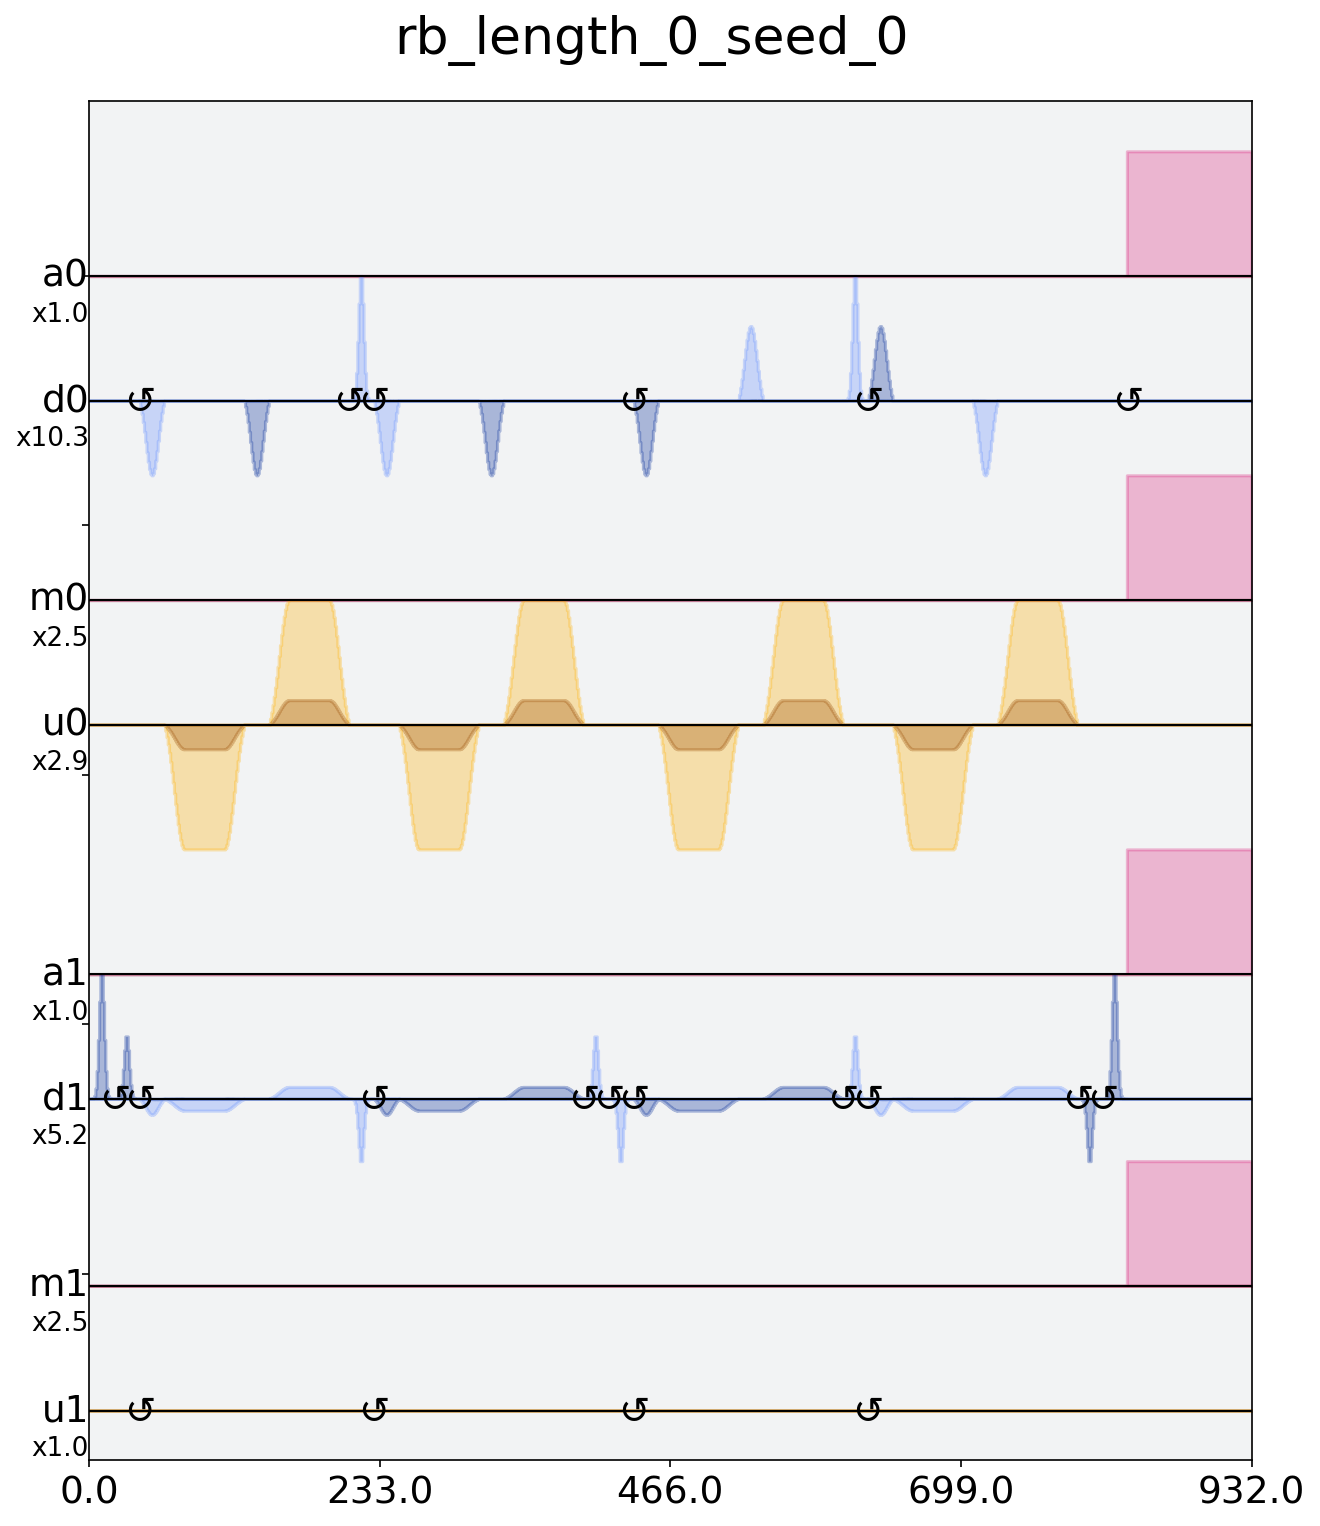

In [56]:
circ_qua._schedule.draw()

In [57]:
print(circ_qua.to_qua())

    no_gaps:
        parallel:
            do('d0'):
                frame_rotation_2pi(phase=0.5,frame=0)
                frame_rotation_2pi(phase=0.25,frame=0)
                wait(10)
                play('Ym_d0', oscillator=0, frame=0, port=[1, 2]
                wait(16)
                play('Xp_d0', oscillator=0, frame=0, port=[1, 2]
                frame_rotation_2pi(phase=0.25,frame=0)
                wait(16)
                play('wf_X90', oscillator=0, frame=0, port=[1, 2]
                frame_rotation_2pi(phase=0.25,frame=0)
                frame_rotation_2pi(phase=0.25,frame=0)
                frame_rotation_2pi(phase=0.25,frame=0)
                play('Ym_d0', oscillator=0, frame=0, port=[1, 2]
                wait(16)
                play('Xp_d0', oscillator=0, frame=0, port=[1, 2]
                frame_rotation_2pi(phase=0.25,frame=0)
                wait(26)
                play('Ym_d0', oscillator=0, frame=0, port=[1, 2]
                wait(16)
                play('